In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Loading dataset

In [2]:
data_ebill = pd.read_csv('11kV bill_units.csv')
data_ebill

,Month,Year,CD,75% CD,130% CD,Connected Load,MD Avg,Avg_Consumption (kWh),Units_kWh,PF Avg,...,Z3 (kVAh),Z1 (Demand kVA),Z2 (Demand kVA),Z3 (Demand kVA),Max_demand,Energy Charge,PF incentive/penalty,Z1/Consumption,Z2/Consumption,Z3/Consumption
0,November,2021.0,670.0,502.5,871.0,1436.0,504.87,254871.0,258056.0,1.00,...,76840.0,514.30,508.130,461.600,514.30,1653743.4,37095.55000,0.518474052,0.194011873,0.300010594
1,December,2021.0,670.0,502.5,871.0,1436.0,505.57,264227.0,284352.0,1.00,...,82192.0,509.18,484.580,471.540,509.18,1802752.4,40875.60000,0.579380608,0.187111839,0.309673122
2,January,2022.0,670.0,502.5,871.0,1436.0,505.34,270707.0,278984.0,1.00,...,83216.0,516.59,502.260,470.500,516.59,1814811,0.00000,0.548844322,0.174771986,0.306959185
3,February,2022.0,670.0,502.5,871.0,1436.0,509.56,272721.0,271048.0,1.00,...,84544.0,517.60,514.000,477.500,517.60,1729563.8,38963.15000,0.506158308,0.179289457,0.30841776
4,March,2022.0,670.0,502.5,871.0,1436.0,514.54,277393.0,298664.0,1.00,...,89888.0,64.83,64.019,58.951,64.83,1888178.05,42932.95000,0.567252959,0.186915315,0.322517151
5,April,2022.0,670.0,502.5,871.0,1436.0,514.92,281749.0,299392.0,1.00,...,89744.0,513.10,511.470,472.120,513.10,1890310.4,43037.60000,0.569414621,0.175958034,0.317246911
6,May,2022.0,670.0,502.5,871.0,1436.0,515.34,282532.0,262752.0,1.00,...,73264.0,516.00,495.600,467.000,516.00,1681677.4,37770.60000,0.517435193,0.154601957,0.257953081
7,June,2022.0,670.0,502.5,871.0,1436.0,512.89,242923.0,256808.0,1.00,...,81360.0,500.00,479.000,482.000,500.00,1670442.48,29859.79000,0.536762678,0.18708809,0.333307262
8,July,2022.0,670.0,502.5,871.0,1436.0,509.77,234395.0,227816.0,1.00,...,75928.0,62.23,60.600,59.569,62.23,1586531.05,27793.55000,0.476460675,0.173143625,0.322327695
9,August,2022.0,670.0,502.5,871.0,1436.0,505.65,230045.0,244952.0,0.99,...,90360.0,492.08,492.960,474.640,492.96,1683641.02,37355.18000,0.47472451,0.198569845,0.39150601


In [3]:
data_ebill.loc[27,'Units_kWh']=358912
data_ebill.loc[25,'Units_kWh']=378448

In [4]:
data_ebill = data_ebill[data_ebill.Month.notna()]

In [5]:
data_ebill.shape

(31, 31)

In [6]:
data_ebill.columns

Index(['Month', 'Year', 'CD', '75% CD', '130% CD', 'Connected Load', 'MD Avg',
       'Avg_Consumption (kWh)', 'Units_kWh', 'PF Avg', 'Z1 (kWh)', 'Z2 (kWh)',
       'Z3 (kWh)', 'Z1 kVArh (lag)', 'Z2 kVArh (lag)', 'Z3 kVArh (lag)',
       'Z1 kVArh (lead)', 'Z2 kVArh (lead)', 'Z3 kVArh (lead)', 'Z1 (kVAh)',
       'Z2 (kVAh)', 'Z3 (kVAh)', 'Z1 (Demand kVA)', 'Z2 (Demand kVA)',
       'Z3 (Demand kVA)', 'Max_demand', 'Energy Charge',
       'PF incentive/penalty', 'Z1/Consumption', 'Z2/Consumption',
       'Z3/Consumption'],
      dtype='object')

In [7]:
data_ebill.dtypes

Month                     object
Year                     float64
CD                       float64
75% CD                   float64
130% CD                  float64
Connected Load           float64
MD Avg                   float64
Avg_Consumption (kWh)    float64
Units_kWh                float64
PF Avg                   float64
Z1 (kWh)                 float64
Z2 (kWh)                 float64
Z3 (kWh)                 float64
Z1 kVArh (lag)           float64
Z2 kVArh (lag)           float64
Z3 kVArh (lag)           float64
Z1 kVArh (lead)          float64
Z2 kVArh (lead)          float64
Z3 kVArh (lead)          float64
Z1 (kVAh)                float64
Z2 (kVAh)                float64
Z3 (kVAh)                float64
Z1 (Demand kVA)          float64
Z2 (Demand kVA)          float64
Z3 (Demand kVA)          float64
Max_demand               float64
Energy Charge             object
PF incentive/penalty     float64
Z1/Consumption            object
Z2/Consumption            object
Z3/Consump

In [8]:
data_ebill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  31 non-null     object 
 1   Year                   31 non-null     float64
 2   CD                     31 non-null     float64
 3   75% CD                 31 non-null     float64
 4   130% CD                31 non-null     float64
 5   Connected Load         31 non-null     float64
 6   MD Avg                 29 non-null     float64
 7   Avg_Consumption (kWh)  29 non-null     float64
 8   Units_kWh              29 non-null     float64
 9   PF Avg                 29 non-null     float64
 10  Z1 (kWh)               29 non-null     float64
 11  Z2 (kWh)               29 non-null     float64
 12  Z3 (kWh)               29 non-null     float64
 13  Z1 kVArh (lag)         29 non-null     float64
 14  Z2 kVArh (lag)         29 non-null     float64
 15  Z3 kVArh

In [9]:
data_ebill.Year = data_ebill.Year.astype(int).astype(str)
data_ebill.head()

/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/432242309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ebill.Year = data_ebill.Year.astype(int).astype(str)


,Month,Year,CD,75% CD,130% CD,Connected Load,MD Avg,Avg_Consumption (kWh),Units_kWh,PF Avg,...,Z3 (kVAh),Z1 (Demand kVA),Z2 (Demand kVA),Z3 (Demand kVA),Max_demand,Energy Charge,PF incentive/penalty,Z1/Consumption,Z2/Consumption,Z3/Consumption
0,November,2021,670.0,502.5,871.0,1436.0,504.87,254871.0,258056.0,1.0,...,76840.0,514.30,508.130,461.600,514.30,1653743.4,37095.55,0.518474052,0.194011873,0.300010594
1,December,2021,670.0,502.5,871.0,1436.0,505.57,264227.0,284352.0,1.0,...,82192.0,509.18,484.580,471.540,509.18,1802752.4,40875.60,0.579380608,0.187111839,0.309673122
2,January,2022,670.0,502.5,871.0,1436.0,505.34,270707.0,278984.0,1.0,...,83216.0,516.59,502.260,470.500,516.59,1814811,0.00,0.548844322,0.174771986,0.306959185
3,February,2022,670.0,502.5,871.0,1436.0,509.56,272721.0,271048.0,1.0,...,84544.0,517.60,514.000,477.500,517.60,1729563.8,38963.15,0.506158308,0.179289457,0.30841776
4,March,2022,670.0,502.5,871.0,1436.0,514.54,277393.0,298664.0,1.0,...,89888.0,64.83,64.019,58.951,64.83,1888178.05,42932.95,0.567252959,0.186915315,0.322517151


In [10]:
data_ebill['Standardized_Date'] = data_ebill['Month']+'-'+data_ebill['Year']
data_ebill.head()

/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/1306465785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ebill['Standardized_Date'] = data_ebill['Month']+'-'+data_ebill['Year']


,Month,Year,CD,75% CD,130% CD,Connected Load,MD Avg,Avg_Consumption (kWh),Units_kWh,PF Avg,...,Z1 (Demand kVA),Z2 (Demand kVA),Z3 (Demand kVA),Max_demand,Energy Charge,PF incentive/penalty,Z1/Consumption,Z2/Consumption,Z3/Consumption,Standardized_Date
0,November,2021,670.0,502.5,871.0,1436.0,504.87,254871.0,258056.0,1.0,...,514.30,508.130,461.600,514.30,1653743.4,37095.55,0.518474052,0.194011873,0.300010594,November-2021
1,December,2021,670.0,502.5,871.0,1436.0,505.57,264227.0,284352.0,1.0,...,509.18,484.580,471.540,509.18,1802752.4,40875.60,0.579380608,0.187111839,0.309673122,December-2021
2,January,2022,670.0,502.5,871.0,1436.0,505.34,270707.0,278984.0,1.0,...,516.59,502.260,470.500,516.59,1814811,0.00,0.548844322,0.174771986,0.306959185,January-2022
3,February,2022,670.0,502.5,871.0,1436.0,509.56,272721.0,271048.0,1.0,...,517.60,514.000,477.500,517.60,1729563.8,38963.15,0.506158308,0.179289457,0.30841776,February-2022
4,March,2022,670.0,502.5,871.0,1436.0,514.54,277393.0,298664.0,1.0,...,64.83,64.019,58.951,64.83,1888178.05,42932.95,0.567252959,0.186915315,0.322517151,March-2022


In [11]:
data_ebill['Standardized_Date'] = pd.to_datetime(data_ebill['Standardized_Date'])+ pd.offsets.MonthEnd(0)
data_ebill.head()

/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/3510697903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ebill['Standardized_Date'] = pd.to_datetime(data_ebill['Standardized_Date'])+ pd.offsets.MonthEnd(0)


,Month,Year,CD,75% CD,130% CD,Connected Load,MD Avg,Avg_Consumption (kWh),Units_kWh,PF Avg,...,Z1 (Demand kVA),Z2 (Demand kVA),Z3 (Demand kVA),Max_demand,Energy Charge,PF incentive/penalty,Z1/Consumption,Z2/Consumption,Z3/Consumption,Standardized_Date
0,November,2021,670.0,502.5,871.0,1436.0,504.87,254871.0,258056.0,1.0,...,514.30,508.130,461.600,514.30,1653743.4,37095.55,0.518474052,0.194011873,0.300010594,2021-11-30
1,December,2021,670.0,502.5,871.0,1436.0,505.57,264227.0,284352.0,1.0,...,509.18,484.580,471.540,509.18,1802752.4,40875.60,0.579380608,0.187111839,0.309673122,2021-12-31
2,January,2022,670.0,502.5,871.0,1436.0,505.34,270707.0,278984.0,1.0,...,516.59,502.260,470.500,516.59,1814811,0.00,0.548844322,0.174771986,0.306959185,2022-01-31
3,February,2022,670.0,502.5,871.0,1436.0,509.56,272721.0,271048.0,1.0,...,517.60,514.000,477.500,517.60,1729563.8,38963.15,0.506158308,0.179289457,0.30841776,2022-02-28
4,March,2022,670.0,502.5,871.0,1436.0,514.54,277393.0,298664.0,1.0,...,64.83,64.019,58.951,64.83,1888178.05,42932.95,0.567252959,0.186915315,0.322517151,2022-03-31


In [12]:
data = pd.read_csv('final_data_in_ML.csv',index_col='Standardized_Date',parse_dates=True)
data

,STANDARDIZED_TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,remarks category
Standardized_Date,,,,,,,
2021-12-01,00:00:00,3.52301,2.10,2.70209,3.40957,No remarks,No remarks
2021-12-01,01:00:00,3.51043,2.84,2.77743,3.39739,No remarks,No remarks
2021-12-01,02:00:00,3.49087,3.12,2.79467,3.37846,No remarks,No remarks
2021-12-01,03:00:00,3.50543,3.44,2.79543,3.39256,No remarks,No remarks
2021-12-01,04:00:00,3.51556,3.72,2.79826,3.40236,No remarks,No remarks
...,...,...,...,...,...,...,...
2024-08-28,19:00:00,3.13486,3.46,2.87175,3.03392,No remarks,No remarks
2024-08-28,20:00:00,3.17401,3.63,2.85830,3.07181,No remarks,No remarks
2024-08-28,21:00:00,3.13113,3.64,2.87098,3.03031,No remarks,No remarks


## Energy consumption across zones 

The 24-hour period is divided into three distinct zones, each with different energy rates. Zone 1 covers the time from 6 AM to 6 PM, Zone 2 spans from 6 PM to 10 PM, and Zone 3 from 10 PM to 6 AM. Zone 2 is identified as the peak period, while Zone 3 is considered the off-peak period.  
In terms of energy costs, the rate of consumption in Zone 2 is 1.5 times higher than in Zone 1, while in Zone 3, the rate is 0.75 times that of Zone 1. This tiered pricing structure encourages energy conservation during peak hours and optimizes usage during off-peak times. 
The platform compares the energy consumption across zones and identifies opportunities for energy savings 

In [13]:
def assign_zone(hour):
    if 6 <= hour < 18:
        return '1'
    elif 18 <= hour < 22:
        return '2'
    else:
        return '3'

In [14]:
data['Hour'] = pd.to_datetime(data['STANDARDIZED_TIME']).dt.hour

In [15]:
data['Zone'] = data['Hour'].apply(assign_zone)

In [16]:
data_month_start = data.groupby(['Zone']).resample('M').agg({'RAW WATER FLOW IN ML':'sum',
                                   'CLEAR WATER SUMP LEVEL IN Meter':'mean',
                                   'CLEAR WATER PUMPING FLOW ML':'sum',
                                   'TREATED WATER PRODUCTION IN ML':'sum', 
                                    'remarks category':lambda x: x.unique()}).reset_index()
data_month_start.head()

,Zone,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category
0,1,2021-12-31,1096.057340,2.913226,922.84825,1060.76434,[No remarks]
1,1,2022-01-31,1057.105040,2.701935,870.34216,1023.06638,"[No remarks, WTP cleaning, energy auditing, Po..."
2,1,2022-02-28,967.267140,2.849077,806.17586,936.12114,"[No remarks, maintanance at intake, Power Fail..."
3,1,2022-03-31,1185.293840,2.815860,961.59264,1147.12747,"[No remarks, Power Failure at Intake]"
4,1,2022-04-30,1067.816403,2.828083,870.52284,1033.42986,"[No remarks, Power Failure at Intake, Power Fa..."


In [17]:
data_month_start_pivot = data_month_start.pivot(index='Standardized_Date',columns=['Zone'],values=['RAW WATER FLOW IN ML','CLEAR WATER SUMP LEVEL IN Meter','CLEAR WATER PUMPING FLOW ML','TREATED WATER PRODUCTION IN ML','remarks category'])
data_month_start_pivot

RAW WATER FLOW IN ML                          \
Zone                                 1           2           3   
Standardized_Date                                                
2021-12-31                  1096.05734   328.28767   573.71467   
2022-01-31                  1057.10504   298.59417   572.57764   
2022-02-28                   967.26714    302.6117  562.870191   
2022-03-31                  1185.29384   355.02836    629.0832   
2022-04-30                 1067.816403   303.46002   572.58604   
2022-05-31                   1177.2118   299.56316   539.83945   
2022-06-30                   974.54157   303.66567   536.66913   
2022-07-31                   793.38325   273.89343     532.382   
2022-08-31                   794.17508   323.30334   635.45465   
2022-09-30                   925.52439   330.03405   654.50058   
2022-10-31                   1096.1704   392.68795   713.46541   
2022-11-30                   1088.9774   367.95495   664.94431   
2022-12-31                  1224.91897   389.74292   657.07784   
2023-01-31                  1205.91319    387.2736  644.524507   
2023-02-28                  1038.86217   340.77644    677.8217   
2023-03-31                  1229.38833   360.33182   720.99354   
2023-04-30                 1211.419104   376.01298   805.52245   
2023-05-31                  1183.75167   414.60783   852.92739   
2023-06-30                  1192.60772   405.33949   808.12939   
2023-07-31                  1037.81393   352.45458   677.97927   
2023-08-31                 1189.364058   406.54569   754.01663   
2023-09-30                  1127.33674   384.00629  751.322709   
2023-10-31                  1053.89539   357.86029  718.817684   
2023-11-30                  1171.65271   381.29111   678.04403   
2023-12-31                  1171.91818    412.4158     810.699   
2024-01-31                  1116.97448   382.99895   754.94214   
2024-02-29                 1191.768891   404.80272   807.58646   
2024-03-31                   1298.0406  434.980555   853.23871   
2024-04-30                 1154.349961    405.1195  802.784022   
2024-05-31                 1274.856142   386.33203   825.01627   
2024-06-30                  1184.91984   399.42128  780.715367   
2024-07-31                   917.28268   332.70455   655.28243   
2024-08-31                  915.658023   308.25204    629.9636   

                  CLEAR WATER SUMP LEVEL IN Meter                      \
Zone                                            1         2         3   
Standardized_Date                                                       
2021-12-31                               2.913226   2.99371  2.836169   
2022-01-31                               2.701935  2.777742  2.699637   
2022-02-28                               2.849077  2.813393  2.720179   
2022-03-31                                2.81586  3.216774  2.662984   
2022-04-30                               2.828083   2.99075  2.570833   
2022-05-31                               2.944704  2.949274  2.680121   
2022-06-30                               2.674889   2.90875  2.608708   
2022-07-31                               2.807634  2.733548  2.802379   
2022-08-31                               2.892849  2.623306  2.869879   
2022-09-30                               2.885111  2.617833  2.872667   
2022-10-31                               2.836989  2.748387  3.213589   
2022-11-30                               2.880861  2.924583  2.991292   
2022-12-31                               2.978118  3.350323   2.80125   
2023-01-31                                3.07836  3.287016  2.895524   
2023-02-28                               3.164464  2.782232  2.762321   
2023-03-31                               3.236075  3.074194  2.711895   
2023-04-30                               3.022389      3.04  2.675458   
2023-05-31                               3.082554  3.098952  3.048508   
2023-06-30                               3.097222   3.23425  3.184125   
2023-07-31                         

In [18]:
data_month_start_pivot.columns = data_month_start_pivot.columns.to_flat_index()
data_month_start_pivot = data_month_start_pivot.rename(columns={('RAW WATER FLOW IN ML','1'):'RAW WATER FLOW IN ML_Z1',
            ('RAW WATER FLOW IN ML', '2'):'RAW WATER FLOW IN ML_Z2',
            ('RAW WATER FLOW IN ML', '3'):'RAW WATER FLOW IN ML_Z3',
            ('CLEAR WATER SUMP LEVEL IN Meter', '1'):'CLEAR WATER SUMP LEVEL IN Meter_Z1',
            ('CLEAR WATER SUMP LEVEL IN Meter', '2'):'CLEAR WATER SUMP LEVEL IN Meter_Z2',
            ('CLEAR WATER SUMP LEVEL IN Meter', '3'):'CLEAR WATER SUMP LEVEL IN Meter_Z3',
            ('CLEAR WATER PUMPING FLOW ML', '1'):'CLEAR WATER PUMPING FLOW ML_Z1',
            ('CLEAR WATER PUMPING FLOW ML', '2'):'CLEAR WATER PUMPING FLOW ML_Z2',
            ('CLEAR WATER PUMPING FLOW ML', '3'):'CLEAR WATER PUMPING FLOW ML_Z3',
            ('TREATED WATER PRODUCTION IN ML', '1'):'TREATED WATER PRODUCTION IN ML_Z1',
            ('TREATED WATER PRODUCTION IN ML', '2'):'TREATED WATER PRODUCTION IN ML_Z2',
            ('TREATED WATER PRODUCTION IN ML', '3'):'TREATED WATER PRODUCTION IN ML_Z3',
            ('remarks category', '1'):'remarks category_Z1',
            ('remarks category', '2'):'remarks category_Z2',
            ('remarks category', '3'):'remarks category_Z3'})

## Merging dataframes

In [25]:
data_month_ebill = data_month_start_pivot.merge(data_ebill,on='Standardized_Date')
data_month_ebill.shape

(30, 47)

In [27]:
data_month_ebill = data_month_ebill[['Standardized_Date','Month','Year','RAW WATER FLOW IN ML_Z1',
       'RAW WATER FLOW IN ML_Z2', 'RAW WATER FLOW IN ML_Z3',
       'CLEAR WATER SUMP LEVEL IN Meter_Z1',
       'CLEAR WATER SUMP LEVEL IN Meter_Z2',
       'CLEAR WATER SUMP LEVEL IN Meter_Z3', 'CLEAR WATER PUMPING FLOW ML_Z1',
       'CLEAR WATER PUMPING FLOW ML_Z2', 'CLEAR WATER PUMPING FLOW ML_Z3',
       'TREATED WATER PRODUCTION IN ML_Z1',
       'TREATED WATER PRODUCTION IN ML_Z2',
       'TREATED WATER PRODUCTION IN ML_Z3', 'remarks category_Z1',
       'remarks category_Z2', 'remarks category_Z3','Avg_Consumption (kWh)', 'Units_kWh',
        'Z1 (kWh)', 'Z2 (kWh)', 'Z3 (kWh)','Energy Charge']]
data_month_ebill.shape

(30, 24)

In [28]:
data_month_ebill.dtypes

Standardized_Date                     datetime64[ns]
Month                                         object
Year                                          object
RAW WATER FLOW IN ML_Z1                       object
RAW WATER FLOW IN ML_Z2                       object
RAW WATER FLOW IN ML_Z3                       object
CLEAR WATER SUMP LEVEL IN Meter_Z1            object
CLEAR WATER SUMP LEVEL IN Meter_Z2            object
CLEAR WATER SUMP LEVEL IN Meter_Z3            object
CLEAR WATER PUMPING FLOW ML_Z1                object
CLEAR WATER PUMPING FLOW ML_Z2                object
CLEAR WATER PUMPING FLOW ML_Z3                object
TREATED WATER PRODUCTION IN ML_Z1             object
TREATED WATER PRODUCTION IN ML_Z2             object
TREATED WATER PRODUCTION IN ML_Z3             object
remarks category_Z1                           object
remarks category_Z2                           object
remarks category_Z3                           object
Avg_Consumption (kWh)                        f

In [29]:
data_month_ebill['Energy Charge'] = data_month_ebill['Energy Charge'].astype(float)

/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/2513809666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_ebill['Energy Charge'] = data_month_ebill['Energy Charge'].astype(float)


In [ ]:
# data_month_ebill['charge_per_unit'] = data_month_ebill['Energy Charge']/ data_month_ebill['Units_kWh']

In [ ]:
## Specific energy consumption: amount of units taken to produce 1ML of treated water
# data_month_ebill['specific_energy_consumption'] = (data_month_ebill['Units_kWh']/data_month_ebill['TREATED WATER PRODUCTION IN ML']).round(2)
## unit_cost: the cost for producing 1ML of treated water
# data_month_ebill['unit_cost'] = (data_month_ebill['Energy Charge']/data_month_ebill['TREATED WATER PRODUCTION IN ML']).round(2)
# data_month_ebill

In [30]:
data_month_ebill['Year'] = data_month_ebill['Standardized_Date'].dt.year
data_month_ebill['Month'] = data_month_ebill['Standardized_Date'].dt.month
data_month_ebill['Month-Year'] = data_month_ebill['Standardized_Date'].dt.strftime('%m-%Y')

/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/2244015143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_ebill['Year'] = data_month_ebill['Standardized_Date'].dt.year
/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/2244015143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_ebill['Month'] = data_month_ebill['Standardized_Date'].dt.month
/var/folders/z1/t4ljwcrd4s7cs37mhvm494m00000gn/T/ipykernel_98003/2244015143.py:3: SettingWithCopyWarning: 
A

In [31]:
data_month_ebill.head()

,Standardized_Date,Month,Year,RAW WATER FLOW IN ML_Z1,RAW WATER FLOW IN ML_Z2,RAW WATER FLOW IN ML_Z3,CLEAR WATER SUMP LEVEL IN Meter_Z1,CLEAR WATER SUMP LEVEL IN Meter_Z2,CLEAR WATER SUMP LEVEL IN Meter_Z3,CLEAR WATER PUMPING FLOW ML_Z1,...,remarks category_Z1,remarks category_Z2,remarks category_Z3,Avg_Consumption (kWh),Units_kWh,Z1 (kWh),Z2 (kWh),Z3 (kWh),Energy Charge,Month-Year
0,2021-12-31,12,2021,1096.05734,328.28767,573.71467,2.913226,2.99371,2.836169,922.84825,...,[No remarks],[No remarks],[No remarks],264227.0,284352.0,153088.0,49440.0,81824.0,1802752.40,12-2021
1,2022-01-31,1,2022,1057.10504,298.59417,572.57764,2.701935,2.777742,2.699637,870.34216,...,"[No remarks, WTP cleaning, energy auditing, Po...","[No remarks, WTP cleaning, Power Failure at In...","[No remarks, WTP cleaning]",270707.0,278984.0,148576.0,47312.0,83096.0,1814811.00,01-2022
2,2022-02-28,2,2022,967.26714,302.6117,562.870191,2.849077,2.813393,2.720179,806.17586,...,"[No remarks, maintanance at intake, Power Fail...","[No remarks, maintanance at intake, Power Fail...","[No remarks, maintanance at intake]",272721.0,271048.0,138040.0,48896.0,84112.0,1729563.80,02-2022
3,2022-03-31,3,2022,1185.29384,355.02836,629.0832,2.81586,3.216774,2.662984,961.59264,...,"[No remarks, Power Failure at Intake]",[No remarks],[No remarks],277393.0,298664.0,157352.0,51849.0,89464.0,1888178.05,03-2022
4,2022-04-30,4,2022,1067.816403,303.46002,572.58604,2.828083,2.99075,2.570833,870.52284,...,"[No remarks, Power Failure at Intake, Power Fa...","[No remarks, Power Failure at Intake, Power Fa...","[No remarks, Power Failure at Intake, Power Fa...",281749.0,299392.0,160432.0,49576.0,89384.0,1890310.40,04-2022


In [32]:
data_month_ebill.dtypes

Standardized_Date                     datetime64[ns]
Month                                          int64
Year                                           int64
RAW WATER FLOW IN ML_Z1                       object
RAW WATER FLOW IN ML_Z2                       object
RAW WATER FLOW IN ML_Z3                       object
CLEAR WATER SUMP LEVEL IN Meter_Z1            object
CLEAR WATER SUMP LEVEL IN Meter_Z2            object
CLEAR WATER SUMP LEVEL IN Meter_Z3            object
CLEAR WATER PUMPING FLOW ML_Z1                object
CLEAR WATER PUMPING FLOW ML_Z2                object
CLEAR WATER PUMPING FLOW ML_Z3                object
TREATED WATER PRODUCTION IN ML_Z1             object
TREATED WATER PRODUCTION IN ML_Z2             object
TREATED WATER PRODUCTION IN ML_Z3             object
remarks category_Z1                           object
remarks category_Z2                           object
remarks category_Z3                           object
Avg_Consumption (kWh)                        f

In [ ]:
# data_month_ebill1 = data_month_ebill.fillna(data_month_ebill.rolling(3, min_periods=1, center=True).mean())

In [ ]:
# data_month_ebill == data_month_ebill1

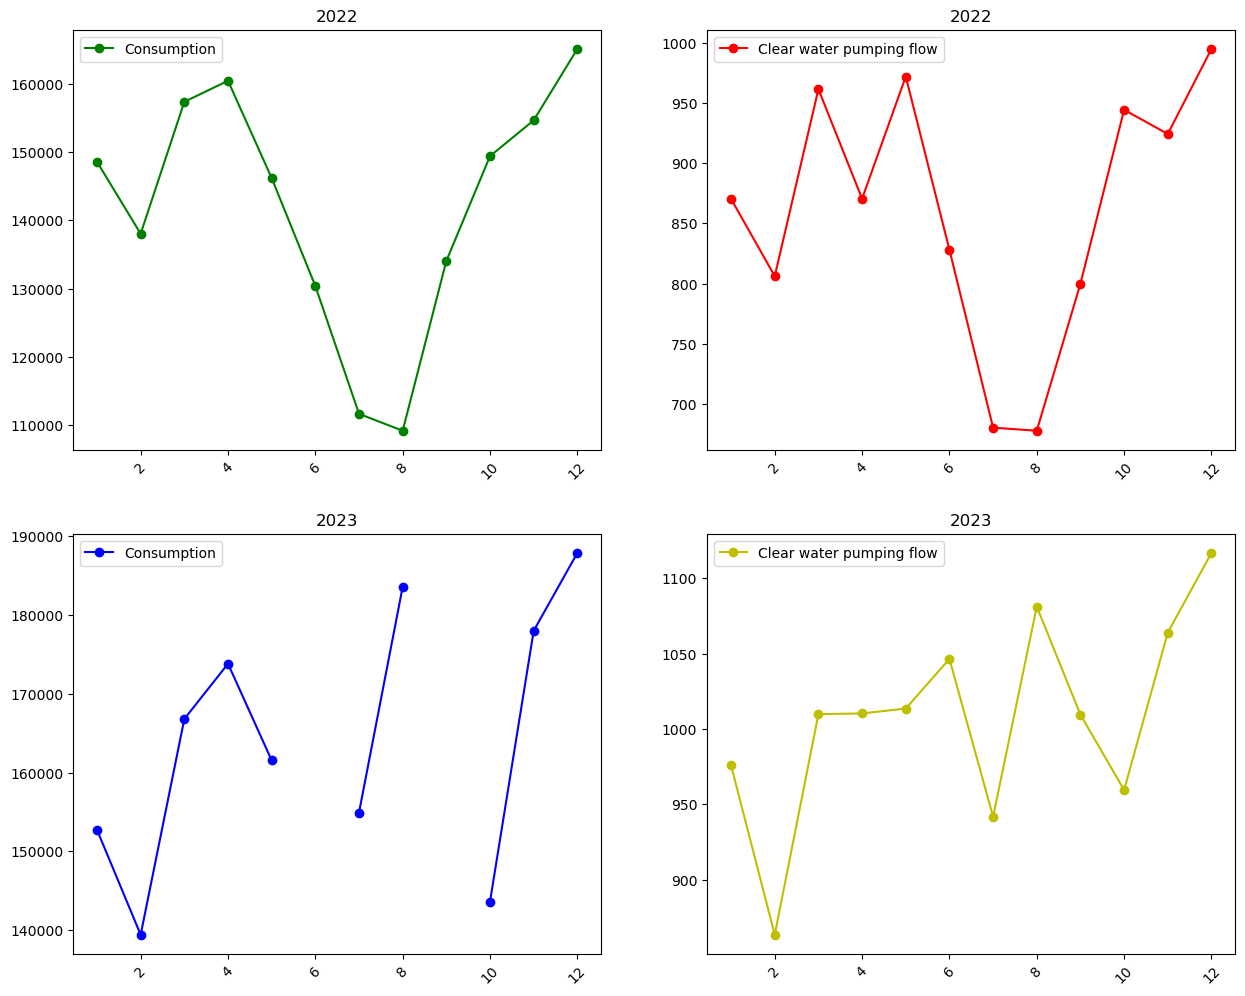

In [35]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(data_month_ebill[data_month_ebill['Year']==2022]['Month'], data_month_ebill[data_month_ebill['Year']==2022]['Z1 (kWh)'], label='Consumption', marker='o',color='g')
plt.xticks(rotation=45)
plt.title("2022")
plt.legend()

plt.subplot(2,2,2)
plt.plot(data_month_ebill[data_month_ebill['Year']==2022]['Month'], data_month_ebill[data_month_ebill['Year']==2022]['CLEAR WATER PUMPING FLOW ML_Z1'], label='Clear water pumping flow', marker='o',color='r')
plt.xticks(rotation=45)
plt.title("2022")
plt.legend()

plt.subplot(2,2,3)
plt.plot(data_month_ebill[data_month_ebill['Year']==2023]['Month'], data_month_ebill[data_month_ebill['Year']==2023]['Z1 (kWh)'], label='Consumption', marker='o',color='b')
plt.xticks(rotation=45)
plt.title("2023")
plt.legend()

plt.subplot(2,2,4)
plt.plot(data_month_ebill[data_month_ebill['Year']==2023]['Month'], data_month_ebill[data_month_ebill['Year']==2023]['CLEAR WATER PUMPING FLOW ML_Z1'], label='Clear water pumping flow', marker='o',color='y')
plt.xticks(rotation=45)
plt.title("2023")
plt.legend()

plt.show()

## Below codes are not updated

In [ ]:
x = data_month_ebill[data_month_ebill['Year']==2022]['Month']
y1 = (data_month_ebill[data_month_ebill['Year']==2022]['Units_kWh'])/100
y2 = data_month_ebill[data_month_ebill['Year']==2022]['CLEAR WATER PUMPING FLOW ML']

fig = px.bar(data_month_ebill, x=x, y=[y1, y2], barmode='group') #title='Raw Water Pumped during various zones in ML')
fig.show()

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [ ]:
# data_month_ebill[['Clear Water Pumping scale', 'Consumption scale']] = scaler.fit_transform(data_month_ebill[['CLEAR WATER PUMPING FLOW ML', 'Units_kWh']])

In [ ]:
data_month_ebill

In [ ]:
data_month_ebill.to_csv('data_month_ebill_cleaned.csv',index=False)

In [ ]:
data_ebill_2022 = data_month_ebill[data_month_ebill['Year']==2022]
# y1 = data_month_ebill[data_month_ebill['Year']==2022]['Consumption scale']
# y2 = data_month_ebill[data_month_ebill['Year']==2022]['Clear Water Pumping scale']
fig = px.bar(data_ebill_2022, x='Month', y=['Consumption scale', 'Clear Water Pumping scale'], barmode='group') #title='Raw Water Pumped during various zones in ML')

fig.show()

In [ ]:
data_ebill_2022 = data_month_ebill[data_month_ebill['Year']==2023]
# y1 = data_month_ebill[data_month_ebill['Year']==2022]['Consumption scale']
# y2 = data_month_ebill[data_month_ebill['Year']==2022]['Clear Water Pumping scale']
fig = px.bar(data_ebill_2022, x='Month', y=['Consumption scale', 'Clear Water Pumping scale'], barmode='group') #title='Raw Water Pumped during various zones in ML')

fig.show()

In [ ]:
data_ebill_2022_2023 = data_month_ebill[(data_month_ebill['Year']==2022)|(data_month_ebill['Year']==2023)]
fig = px.bar(data_ebill_2022_2023, x='Month-Year', y=['Consumption scale', 'Clear Water Pumping scale'], barmode='group') #title='Raw Water Pumped during various zones in ML')

fig.show()

In [ ]:
data_ebill_2022_2023 = data_month_ebill[(data_month_ebill['Year']==2022)|(data_month_ebill['Year']==2023)]
fig = px.bar(data_ebill_2022_2023, x='Month-Year', y=['Consumption scale', 'Clear Water Pumping scale'], barmode='group') #title='Raw Water Pumped during various zones in ML')

fig.show()

In [ ]:
sorted_data = data_month_ebill.sort_values(by='CLEAR WATER PUMPING FLOW ML')

fig = px.line(sorted_data, x="CLEAR WATER PUMPING FLOW ML", y="Units_kWh", hover_data=['Standardized_Date','RAW WATER FLOW IN ML'])
fig.show()

In [ ]:
data_month_ebill.dtypes

In [ ]:
data[(data.index>='2022-03-01')&(data.index<'2022-04-01')&(data['remarks category']!='No remarks')].shape

In [ ]:
data[(data.index>='2022-04-01')&(data.index<'2022-05-01')&(data['remarks category']!='No remarks')]#.shape

In [ ]:
data[(data.index>='2023-10-01')&(data.index<'2023-11-01')&(data['remarks category']!='No remarks')].shape

In [ ]:
data[(data.index>='2023-12-01')&(data.index<'2024-01-01')&(data['remarks category']!='No remarks')].shape

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['Standardized_Date'], (data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['Units_kWh'])/100, label='consumption', marker='o',color='g')
plt.plot(data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['Standardized_Date'], data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['CLEAR WATER PUMPING FLOW ML'], label='clear water', marker='o',color='r')
plt.legend()
plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data_month_ebill[(data_month_ebill['Standardized_Date']>='2023-01-01')&(data_month_ebill['Standardized_Date']<'2024-01-01')]['Standardized_Date'], (data_month_ebill[(data_month_ebill['Standardized_Date']>='2023-01-01')&(data_month_ebill['Standardized_Date']<'2024-01-01')]['Units_kWh'])/100, label='consumption', marker='o',color='b')
plt.plot(data_month_ebill[(data_month_ebill['Standardized_Date']>='2023-01-01')&(data_month_ebill['Standardized_Date']<'2024-01-01')]['Standardized_Date'], data_month_ebill[(data_month_ebill['Standardized_Date']>='2023-01-01')&(data_month_ebill['Standardized_Date']<'2024-01-01')]['CLEAR WATER PUMPING FLOW ML'], label='clear water', marker='o',color='y')
plt.legend()
plt.xticks(rotation=45)

In [ ]:
plt.plot(data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['Standardized_Date'], data_month_ebill[data_month_ebill['Standardized_Date']<'2023-01-01']['CLEAR WATER PUMPING FLOW ML'], label='CLEAR WATER PUMPING FLOW ML', marker='o',color='g')
plt.ylabel('clear water pumping flow in ML')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Specific energy consumption = kwh/treated water
unit cost = cost/treated water